# Discounted Price Prediction

Machine Learning Project which predict the discounts on the products avalaible on Amazon and Flipkart

This is the capstone project of Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati.

## Description


Artificial Intelligence is an integral part of all major e-commerce companies today. Today's online retail platforms are heavily powered by algorithms and applications that use AI. Machine learning is used in a variety of ways, from inventory control and quality assurance in the warehouse to product recommendations and sales demographics on the website.

Let’s say you want to create a promotional campaign for an e-commerce store and offer discounts to customers in the hopes that this might increase your sales.

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices. In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices.

In [219]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
import lightgbm
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [71]:
df = pd.read_csv("train.csv")

In [72]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


### Data Precprocessing

In [73]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [74]:
df.shape

(15730, 16)

In [75]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [76]:
df = df.dropna()

In [77]:
df.isnull().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [78]:
#df["Offer %"].replace(" %"," ")


# Checking for the outlier removal

In [79]:
x = df["price1"]
y = df["actprice1"]

Text(0, 0.5, 'Actual price')

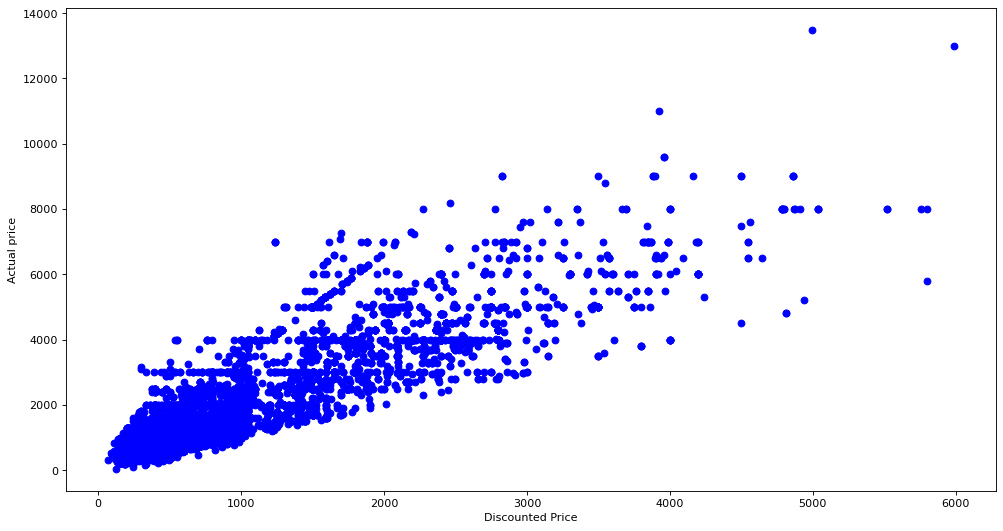

In [80]:
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(x,y, c="b")
plt.xlabel("Discounted Price")
plt.ylabel("Actual price")

In [81]:
df.shape

(14945, 16)

In [82]:
df.platform.unique()

array(['Flipkart', 'Amazon'], dtype=object)

In [83]:
features = df.drop(["title","price1","maincateg","platform","fulfilled1","Offer %"], axis =1)

In [84]:
features.head()

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
0,16695,3.9,999,38.0,7.0,17.0,9.0,6.0,3,3
1,5120,3.8,1999,531.0,69.0,264.0,92.0,73.0,29,73
2,18391,4.4,4999,17.0,4.0,11.0,3.0,2.0,1,0
3,495,4.2,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595
4,16408,3.9,2299,77.0,3.0,35.0,21.0,7.0,7,7


In [85]:
target_price = df["price1"]
target_price

0         698
1         999
2        2749
3         518
4        1379
         ... 
15724     649
15725     567
15726     499
15728    2249
15729    1539
Name: price1, Length: 14945, dtype: int64

In [86]:
df[df["price1"]>=5900]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
5975,9526,Pulseboost Hd Wntr W Running Shoes For Women ...,4.5,Women,Flipkart,5984,12999,53.97%,10.0,1.0,8.0,1.0,0.0,0,1,1


Hence, there is no outliers present in the give dataset


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(features, target_price, test_size=20, random_state=10 )

In [89]:
x_train

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
14548,14123,4.3,999,17119.0,2301.0,9662.0,5025.0,1421.0,366,643
8324,15057,3.8,1099,287.0,38.0,149.0,42.0,32.0,24,40
10557,4735,4.3,899,8998.0,1321.0,5182.0,2559.0,681.0,200,376
4027,20690,4.0,499,228.0,116.0,11.0,5.0,9.0,21,54
5191,7518,3.7,549,542.0,388.0,7.0,14.0,25.0,41,0
...,...,...,...,...,...,...,...,...,...,...
12258,14277,4.2,4299,1022.0,155.0,588.0,247.0,85.0,40,62
1420,19682,4.4,3999,14.0,2.0,9.0,3.0,1.0,1,0
13487,19628,4.4,699,17.0,1.0,12.0,1.0,2.0,2,0
7708,2674,3.8,999,45.0,6.0,21.0,12.0,3.0,2,7


In [90]:
x_test

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
3551,10263,3.8,599,327.0,50.0,149.0,74.0,45.0,21,38
11506,12389,4.2,999,21.0,3.0,12.0,4.0,4.0,0,1
6530,2575,4.2,4299,166.0,24.0,94.0,39.0,12.0,6,15
2612,15347,4.0,999,792.0,106.0,415.0,158.0,99.0,44,76
10074,20924,4.3,1299,155.0,20.0,96.0,39.0,7.0,3,10
9709,17402,3.4,849,408.0,54.0,165.0,58.0,57.0,44,84
11615,1536,4.2,599,301.0,30.0,169.0,70.0,32.0,12,18
5522,131,3.7,813,79.0,49.0,10.0,14.0,16.0,35,31
6760,13872,3.9,1999,230.0,37.0,107.0,54.0,26.0,14,28
2308,15427,4.5,4999,17.0,4.0,13.0,2.0,1.0,0,1


In [91]:
y_test

3551      299
11506     529
6530     2794
2612      499
10074    1005
9709      346
11615     379
5522      583
6760      479
2308     2707
15213     289
42        899
4790      199
2376      381
2897      387
4703      493
11877     285
13589     289
249       349
10878     666
Name: price1, dtype: int64

In [92]:
y_train

14548     835
8324      501
10557     756
4027      497
5191      543
         ... 
12258    2149
1420     2278
13487     469
7708      500
1362      569
Name: price1, Length: 14925, dtype: int64

# Linear Regression 

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [94]:
lr.fit(x_train, y_train)

LinearRegression()

In [95]:
y_predicted  = lr.predict(x_test)
y_predicted.reshape(20,1)

array([[ 305.68086867],
       [ 547.46670506],
       [2044.80788413],
       [ 517.9062848 ],
       [ 704.25663136],
       [ 362.58934078],
       [ 360.45806681],
       [ 384.87052437],
       [ 959.54634233],
       [2411.58517491],
       [ 217.79148657],
       [ 822.1527015 ],
       [ 272.57621616],
       [ 498.29281897],
       [ 412.97656353],
       [ 531.79568484],
       [ 656.76547437],
       [ 253.16758315],
       [ 262.87179966],
       [ 903.38151732]])

In [96]:
lr.score(x_test, y_test)

0.8777557493338121

In [97]:
np.sqrt(((y_predicted - y_test) ** 2).mean())

249.6133208633745

# Random Forest 

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [140]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [203]:
regressor.score(x_test, y_test)

0.9830170434249907

# AdaBoost

In [202]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

AdaBoostRegressor()

In [204]:
adb.score(x_test, y_test)

0.8491558668722818

# xgboost

In [352]:
xgb = xgboost.XGBRegressor(max_depth=6,subsample=1,colsample_bytree= 1.0,min_child_weight=1)
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

0.983507657275731

Hyperparameter tuning using GridsearchCv

In [217]:
# A parameter grid for XGBoost

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [330]:
#grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, verbose=3 )
#grid.fit(x_train, y_train)

In [ ]:
grid.score(x_train, y_train)

# LGBMRegressor

In [210]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
lgb.score(x_test, y_test)

0.9767543834658646

# Importing the test data for the prediction of discounted price 

In [251]:
testing = pd.read_csv("test.csv")
testing

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,NaN,Women,Flipkart,699,1235,153,NaN,323,155,62,NaN,1
5240,297,Slip On For Men (Tan),3.9,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,18733,Women Grey Heels Sandal,3.8,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


In [281]:
df2 = testing.drop(["title","maincateg","platform","fulfilled1"], axis =1)

In [282]:
df2

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
0,2242,3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0
1,20532,3.9,499,3015,404,1458.0,657,397,182,321.0
2,10648,3.9,999,449,52,229.0,70,71,33,46.0
3,20677,3.9,2999,290,40,141.0,51,49,17,32.0
4,12593,3.9,999,2423,326,1265.0,414,293,143,308.0
...,...,...,...,...,...,...,...,...,...,...
5239,14033,NaN,699,1235,153,NaN,323,155,62,NaN
5240,297,3.9,1993,329,56,350.0,37,60,5,37.0
5241,18733,3.8,999,1280,135,574.0,290,172,94,150.0
5242,6162,3.9,499,4867,574,2384.0,974,648,328,533.0


In [283]:
df2.isna().sum()

id              0
Rating        203
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
dtype: int64

### Removing null values from the dataset with the mean value

In [284]:
mean1=df2['Rating'].mean()
mean2=df2['star_5f'].mean()
mean3=df2['star_1f'].mean()

In [285]:
df2['Rating'].fillna(value=df2['Rating'].mean(), inplace=True)
df2['star_5f'].fillna(value=df2['star_5f'].mean(), inplace=True)
df2['star_1f'].fillna(value=df2['star_1f'].mean(), inplace=True)

In [286]:
df2

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000
...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000


In [287]:
df2.isna().sum()

id            0
Rating        0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
dtype: int64

In [288]:
df2.shape

(5244, 10)

# Linear Regression Prediction

In [289]:
prediction = lr.predict(df2)
prediction
#prediction=prediction.reshape(4997,1)

array([447.50683383, 274.00037536, 497.81819633, ..., 485.19417189,
       252.05715575, 397.1693222 ])

# Random Forest Prediction

In [290]:
prediction2 = regressor.predict(df2)

In [291]:
prediction2

array([401.37, 275.78, 440.57, ..., 382.87, 193.92, 704.29])

# xgboost Prediction

In [317]:
df_xg = df2.drop("Price1", axis =1)

In [318]:
df_xg

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000
...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000


In [319]:
prediction3 = xgb.predict(df_xg)
prediction3


array([402.28543, 274.5224 , 352.77417, ..., 424.33664, 246.12132,
       598.09644], dtype=float32)

## Discounted Price

In [293]:
prediction[0:20]

array([ 447.50683383,  274.00037536,  497.81819633, 1413.7543259 ,
        503.76581525,  504.36834376, 1135.81901264, 2046.46877492,
        266.36386882, 1065.88181548,  223.36832495,  472.99926699,
        472.93923566,  530.14297513,  995.85823135,  546.68907842,
       1926.3146912 ,  211.20119908,  320.92689179,  712.00223701])

In [294]:
prediction2[0:20]

array([ 401.37,  275.78,  440.57,  966.53,  404.69,  482.88,  499.06,
       2652.13,  294.63,  780.48,  251.  ,  470.83,  406.19,  474.94,
        874.13,  483.76, 1782.43,  321.25,  386.51,  556.15])

# Predict discounted prices of the listed products based on their ratings and actual prices.

In [295]:
df2[["actprice1"]].head(20)

,actprice1
0,999
1,499
2,999
3,2999
4,999
5,999
6,2400
7,4299
8,499
9,2299


# Percentages of discount Linear Regression

In [296]:
#discount = (df2[["actprice1"]]-prediction)/df2[["actprice1"]]*100

In [297]:
df3_linear = df2

In [298]:
df3_linear
df3_linear["Price1"] = prediction
df3_linear

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,Price1
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000,447.506834
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000,274.000375
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000,497.818196
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000,1413.754326
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000,503.765815
...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786,403.121531
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000,949.585825
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000,485.194172
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000,252.057156


In [304]:
df3_linear.drop("Price1", axis =1)

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000
...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000


In [299]:
df_linear =df2[["id", "Price1"]]

In [300]:
df_linear.to_csv('Santosh.csv')

In [301]:
df_linear.shape

(5244, 2)

#Below dataframe has the predicted price and % discount of products based on the ratings and actual price of the products on the basis of Random forest classifier for regression problem

In [305]:
df3_random = df3_linear.drop("Price1", axis =1)

In [307]:
df3_random["price1_"]= prediction2
df3_random

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,price1_
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000,401.37
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000,275.78
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000,440.57
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000,966.53
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000,404.69
...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786,470.82
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000,847.60
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000,382.87
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000,193.92


In [308]:
df_random =df3_random[["id", "price1_"]]
df_random

,id,price1_
0,2242,401.37
1,20532,275.78
2,10648,440.57
3,20677,966.53
4,12593,404.69
...,...,...
5239,14033,470.82
5240,297,847.60
5241,18733,382.87
5242,6162,193.92


In [326]:
df_random.to_csv('Santosh_rand.csv')

# xgboost exporting

In [321]:
df_xg["price1"] = prediction3

In [322]:
df_xg

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,price1
0,2242,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000,402.285431
1,20532,3.900000,499,3015,404,1458.000000,657,397,182,321.000000,274.522400
2,10648,3.900000,999,449,52,229.000000,70,71,33,46.000000,352.774170
3,20677,3.900000,2999,290,40,141.000000,51,49,17,32.000000,790.971680
4,12593,3.900000,999,2423,326,1265.000000,414,293,143,308.000000,431.195831
...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,4.011089,699,1235,153,1557.443199,323,155,62,270.397786,442.335358
5240,297,3.900000,1993,329,56,350.000000,37,60,5,37.000000,1059.089600
5241,18733,3.800000,999,1280,135,574.000000,290,172,94,150.000000,424.336639
5242,6162,3.900000,499,4867,574,2384.000000,974,648,328,533.000000,246.121323


In [328]:
df_xg = df_xg[['id', "price1"]]
df_xg

,id,price1
0,2242,402.285431
1,20532,274.522400
2,10648,352.774170
3,20677,790.971680
4,12593,431.195831
...,...,...
5239,14033,442.335358
5240,297,1059.089600
5241,18733,424.336639
5242,6162,246.121323


In [329]:
df_xg.to_csv('Santosh_xg.csv')